Dataset loaded successfully.
First few rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN           

C:\Users\user\AppData\Local\Temp\ipykernel_15204\650662661.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15204\650662661.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

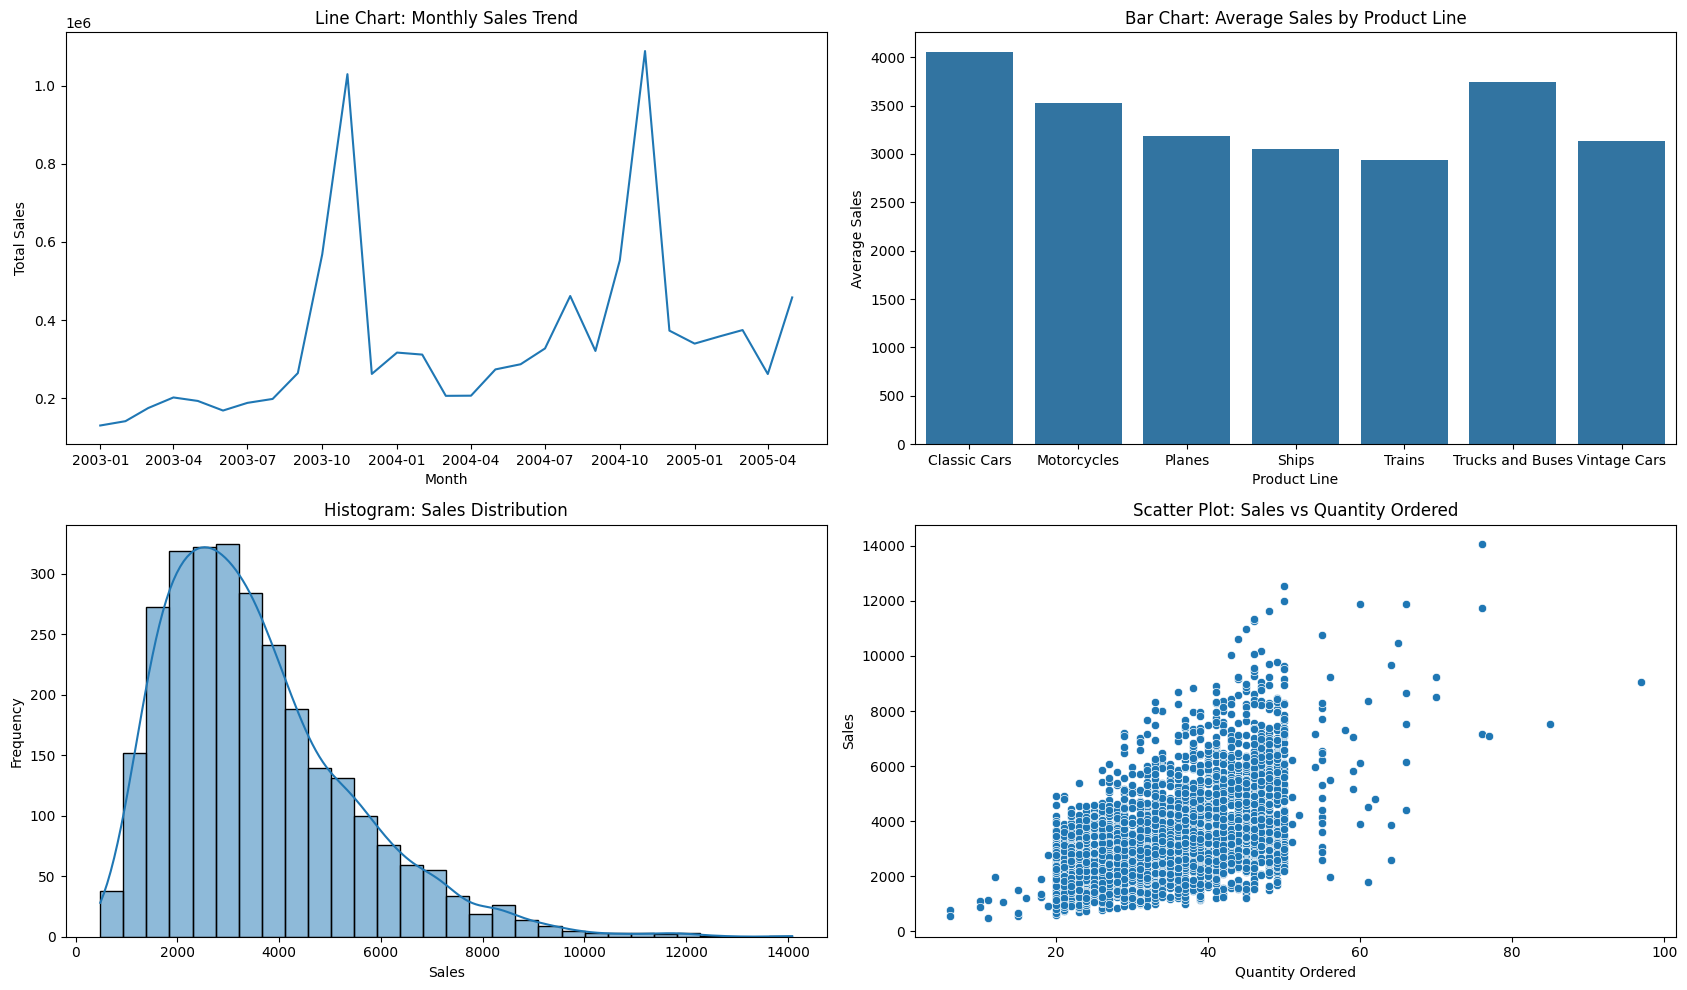

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try: 
    data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
    print("Dataset loaded successfully.")

except Exception as e:
    print("Error loading dataset: ", e)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

#check data info
print("\nData Information:")
print(data.info())

#data types
print("\nData Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing values")
print(data.isnull().sum())



#clean data
# Convert 'OrderDate' to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], format='%m/%d/%Y %H:%M', errors='coerce')


#filling categorical missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

#filling missing values with standard deviation
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].std(), inplace=True) 

    print("\nCleaned Missing values")

#summary statistics
print("\nSummary Statistics:")
print(data.describe())

#group average sales by productline
avg_sales_productline = data.groupby('PRODUCTLINE')['SALES'].mean().reset_index()
print("\nAverage Sales by Product Line:")
print(avg_sales_productline)

#group average sales by country
avg_sales_country = data.groupby('COUNTRY')['SALES'].mean().reset_index()
print("\nAverage Sales by Country:")
print(avg_sales_country)

#visualizations
plt.figure(figsize=(17, 10))

#line plot monthly sales trend
plt.subplot(2, 2, 1)
data['MONTH'] = data['ORDERDATE'].dt.to_period('M')
monthly_sales = data.groupby('MONTH')['SALES'].sum().reset_index()
monthly_sales['MONTH'] = monthly_sales['MONTH'].dt.to_timestamp()
sns.lineplot(x='MONTH', y='SALES', data=monthly_sales)
plt.title('Line Chart: Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')




#bar plot of average sales by product line
plt.subplot(2, 2, 2)
sns.barplot(x='PRODUCTLINE', y='SALES', data=avg_sales_productline)
plt.title('Bar Chart: Average Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Average Sales')

#histogram of sales distribution
plt.subplot(2, 2, 3)
sns.histplot(data['SALES'], bins=30, kde=True)
plt.title('Histogram: Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

#scatter plot of sales vs quantity sold
plt.subplot(2, 2, 4)
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=data)
plt.title('Scatter Plot: Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()








### Line Chart - Monthly Sales
-Sales show seasonal peaks in some months,likely due to shopping seasons.
-Certain months have lower sales, indicating off-peak periods.
### Bar Chart - Average Sales by product line
-Classic cars and Trucks and buses generates the highest average sales
-Ship and Train generates the lowest average sales
## Histogram - Sales Distribution
-Most transaction are below $5,000, showing that smaller sales are more common.
-Afew very large sales exist creating outliers with high values.
## Scatter Plot -Quantity ordered vs Sales
-Higher quanties generally lead to higher sales.
-Some quantity orders have low sales values, possibly due to discounts or promo products.


